Оцененные коэффициенты: Intercept=19.980, price=-0.543, advertising=0.336
Mean Squared Error: 23.642


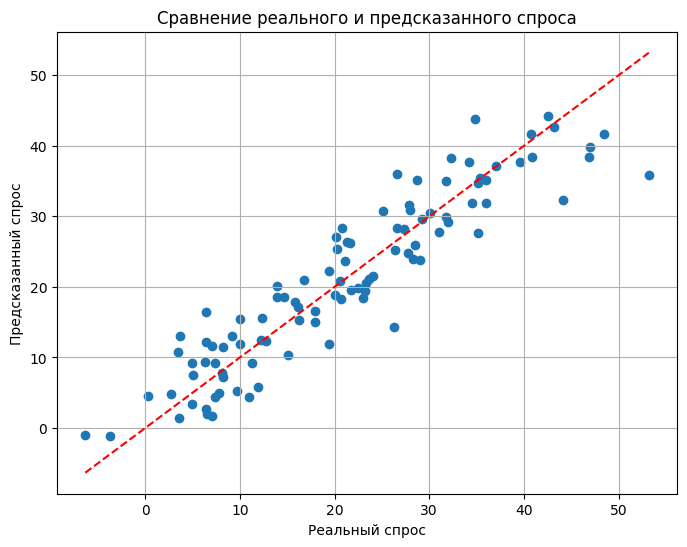

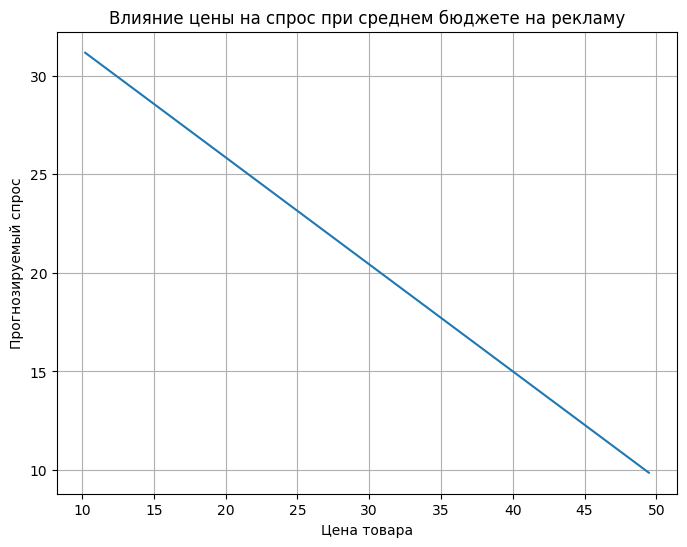

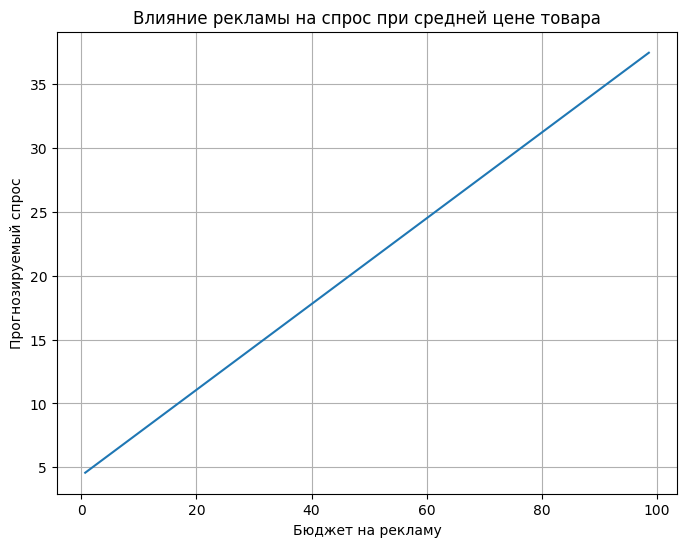

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Генерация искусственных данных для примера
np.random.seed(42)
m = 100  # число наблюдений

# Факторы: цена (x1), реклама (x2)
x1 = np.random.uniform(10, 50, m)  # цена товара
x2 = np.random.uniform(0, 100, m)  # бюджет на рекламу

# Истинные параметры модели
beta_0 = 20
beta_1 = -0.5   # спрос падает с ростом цены
beta_2 = 0.3    # спрос растет с увеличением рекламы

# Формируем целевую переменную с шумом
noise = np.random.normal(0, 5, m)
y = beta_0 + beta_1 * x1 + beta_2 * x2 + noise

# Создаем DataFrame для удобства
data = pd.DataFrame({'price': x1, 'advertising': x2, 'demand': y})

# Подготовка данных для модели
X = data[['price', 'advertising']]
y = data['demand']

# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(X, y)

# Предсказания и оценка качества модели
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)

print(f'Оцененные коэффициенты: Intercept={model.intercept_:.3f}, price={model.coef_[0]:.3f}, advertising={model.coef_[1]:.3f}')
print(f'Mean Squared Error: {mse:.3f}')

# Визуализация результатов: реальные vs предсказанные значения спроса
plt.figure(figsize=(8,6))
plt.scatter(y, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Реальный спрос')
plt.ylabel('Предсказанный спрос')
plt.title('Сравнение реального и предсказанного спроса')
plt.grid(True)
plt.show()

# Анализ влияния факторов: графики зависимости спроса от каждого фактора при фиксированном другом факторе

price_range = np.linspace(data['price'].min(), data['price'].max(), 100)
advertising_mean = data['advertising'].mean()

demand_vs_price = model.intercept_ + model.coef_[0] * price_range + model.coef_[1] * advertising_mean

plt.figure(figsize=(8,6))
plt.plot(price_range, demand_vs_price)
plt.xlabel('Цена товара')
plt.ylabel('Прогнозируемый спрос')
plt.title('Влияние цены на спрос при среднем бюджете на рекламу')
plt.grid(True)
plt.show()

advertising_range = np.linspace(data['advertising'].min(), data['advertising'].max(), 100)
price_mean = data['price'].mean()

demand_vs_advertising = model.intercept_ + model.coef_[0] * price_mean + model.coef_[1] * advertising_range

plt.figure(figsize=(8,6))
plt.plot(advertising_range, demand_vs_advertising)
plt.xlabel('Бюджет на рекламу')
plt.ylabel('Прогнозируемый спрос')
plt.title('Влияние рекламы на спрос при средней цене товара')
plt.grid(True)
plt.show()